In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
train_data = pd.read_csv('../data/train_final.csv', encoding='latin1')
val_data = pd.read_csv('../data/val_final.csv', encoding='latin1')
test_data = pd.read_csv('../data/test_final.csv', encoding='latin1')

In [3]:
for col in ['runtime','num_faces','hue','hue_sd','saturation','saturation_sd ','brightness','brightness_sd',
            'blue','blue_sd','green','green_sd','red','red_sd ']:
    mean_feature = np.mean(train_data[col])
    sd_feature = np.std(train_data[col])
    
    if sd_feature != 0:
        train_data[col] = (train_data[col] - mean_feature) / sd_feature
        val_data[col] = (val_data[col] - mean_feature) / sd_feature
        test_data[col] = (test_data[col] - mean_feature) / sd_feature
    else:
        train_data[col] = (train_data[col] - mean_feature) 
        val_data[col] = (val_data[col] - mean_feature) 
        test_data[col] = (test_data[col] - mean_feature)

In [4]:
rem_cols =  list(set(STOPWORDS) & set(train_data.columns))
rem_cols.append('imdb_score')
rem_cols.append('posterID')

In [5]:
train_X = train_data.drop(columns=rem_cols)
val_X = val_data.drop(columns=rem_cols)
test_X = test_data.drop(columns=rem_cols)
train_y = train_data.imdb_score
val_y = val_data.imdb_score
test_y = test_data.imdb_score

In [6]:
# imp_cols = ['runtime', 'documentary', 'drama', 'horror', 'action', 'animation',
#        'hue_sd', 'saturation_sd ', 'hue', 'saturation', 'brightness_sd',
#        'green_sd', 'blue_sd', 'red_sd ', 'blue', 'green', 'red', 'short',
#        'brightness', 'thriller']
# train_X = train_data[imp_cols]
# val_X = val_data[imp_cols]
# test_X = test_data[imp_cols]
# train_y = train_data.imdb_score
# val_y = val_data.imdb_score
# test_y = test_data.imdb_score

In [7]:
train_X

,runtime,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,...,subway,cities,excitement,monstrous,May,traps,traffic,heir,fearless,eliminate
0,0.783686,-0.216658,-0.211632,-0.832558,2.121743,1.853820,-0.387582,-0.339980,0.351619,1.771207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.044494,-0.216658,-1.197686,-0.371092,-0.279790,-0.896663,-0.498212,0.927495,-1.012683,-1.225915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.446279,-0.216658,1.803157,-0.938981,-0.561388,-1.358654,-0.300175,0.476504,1.576181,0.064789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.013821,-0.216658,0.653993,-0.312038,-0.672706,0.982971,0.531417,0.350392,0.271128,1.133443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.565941,-0.216658,-0.004048,0.907230,-0.093724,0.017742,0.753552,0.472705,-0.561222,-0.196671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13189,-0.504594,-0.216658,-0.038594,0.960138,-0.934452,-0.733416,-0.928683,-1.157100,-0.862697,-1.386202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13190,0.231566,-0.216658,-0.714362,-0.840712,0.235713,1.616463,0.784342,0.747825,-0.127652,1.566644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13191,0.078199,-0.216658,0.408528,-0.926015,-1.103991,-0.203606,-0.973200,-1.619233,0.503233,-0.174021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13192,-0.228534,-0.216658,-1.272881,-0.823072,0.742440,0.644669,-0.088083,-0.180132,-0.729585,0.670421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
alphas = [0.1, 1, 5, 10, 100]
train_r2 = []
val_r2 = []
test_r2 = []

train_mse = []
val_mse = []
test_mse = []

regs = []
for alp in alphas:
    print(alp)
    ridgeReg = Ridge(alpha = alp, random_state = 0).fit(train_X, train_y)
    train_r2.append(ridgeReg.score(train_X, train_y))
    val_r2.append(ridgeReg.score(val_X, val_y))
    test_r2.append(ridgeReg.score(test_X, test_y))

    train_mse.append(mean_squared_error(ridgeReg.predict(train_X), train_y))
    val_mse.append(mean_squared_error(ridgeReg.predict(val_X), val_y))
    test_mse.append(mean_squared_error(ridgeReg.predict(test_X), test_y))

res = pd.DataFrame({'alpha': alphas, 'train_r2': train_r2, 'val_r2': val_r2, 'test_r2': test_r2, 'train_mse': train_mse, 'val_mse': val_mse, 'test_mse': test_mse})

0.1
1
5
10
100


In [11]:
res.to_csv('res.csv', index=False)

In [12]:
res = pd.read_csv('res.csv')

In [14]:
res.sort_values(by='val_mse')

,alpha,train_r2,val_r2,test_r2,train_mse,val_mse,test_mse
4,100.0,0.492799,0.352405,0.390991,0.749172,0.923437,0.908345
3,10.0,0.634264,0.296577,0.346365,0.540217,1.003045,0.974906
2,5.0,0.662290,0.255346,0.306424,0.498821,1.061839,1.034478
1,1.0,0.693804,0.137866,0.191024,0.452273,1.229359,1.206599
0,0.1,0.699453,0.043802,0.097634,0.443929,1.363489,1.345892


In [3]:
movies = pd.read_csv('../final_data.csv')

In [4]:
best_scores = movies.sort_values(by='IMDB Score', ascending=False).iloc[:16]

In [5]:
best_scores = best_scores['overview'].reset_index(drop=True)

<ipython-input-6-98a7dc070e51>:10: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



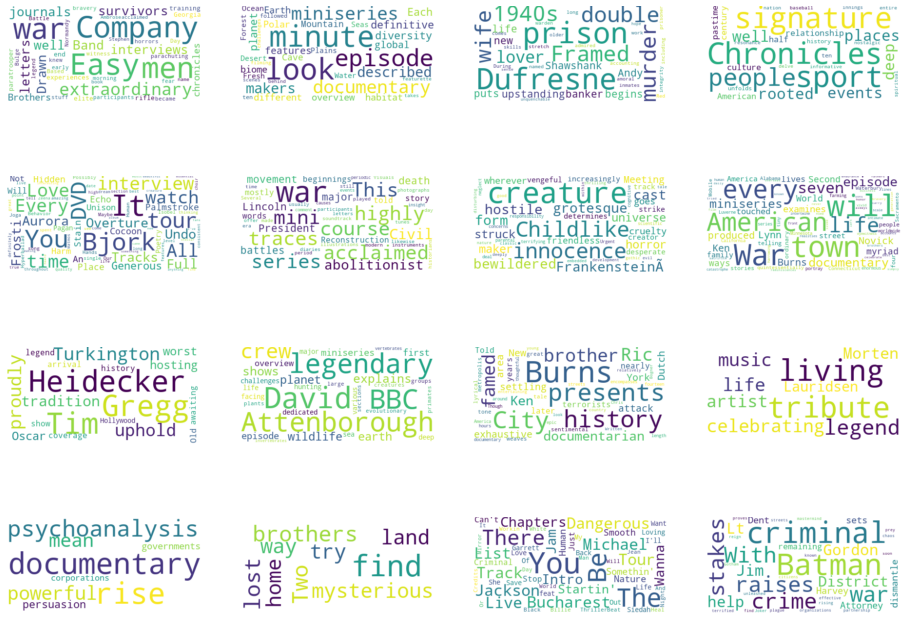

In [6]:
fig, axes = plt.subplots(4, 4, figsize=(16, 12))

for i in range(4):
    for j in range(4):
        text = best_scores[4*i + j]
        wordcloud = WordCloud(max_font_size=60, background_color='white').generate(text)
        axes[i][j].imshow(wordcloud, interpolation='bilinear')
        axes[i][j].axis("off")

fig.show()

,posterID,Genre,overview,IMDB Score,director,actors,runtime,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd
0,114709.jpg,Animation|Adventure|Comedy,"Led by Woody, Andy's toys live happily in his ...",8.3,John Lasseter,Tom Hanks|Tim Allen|Don Rickles,81.0,0.0,151.276878,151.869218,66.135763,62.337320,71.163939,56.382660,104.695178,65.735476,105.184332,63.553541,108.978699,80.047496
1,113497.jpg,Action|Adventure|Family,When siblings Judy and Peter discover an encha...,6.9,Joe Johnston,Robin Williams|Jonathan Hyde|Kirsten Dunst,104.0,0.0,41.055929,60.180929,35.694993,55.855796,69.935765,49.989751,28.219739,37.120394,33.400156,46.534797,39.422072,55.787320
2,113228.jpg,Comedy|Romance,A family wedding reignites the ancient feud be...,6.6,Howard Deutch,Walter Matthau|Jack Lemmon|Ann-Margret,101.0,0.0,102.813966,114.800332,78.614175,75.975167,51.993813,79.010993,64.299943,54.116315,69.646711,63.164000,102.355974,76.310464
3,114885.jpg,Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom...",5.7,Forest Whitaker,Whitney Houston|Angela Bassett|Loretta Devine,127.0,0.0,177.655548,94.307426,37.488539,77.632386,72.444808,39.050515,126.667357,88.149926,152.306093,84.430724,175.925107,78.686815
4,113041.jpg,Comedy|Family|Romance,Just when George Banks has recovered from his ...,5.9,Charles Shyer,Steve Martin|Diane Keaton|Martin Short,106.0,1.0,136.282003,127.991820,26.698028,95.682021,81.480432,39.967398,84.410325,76.363809,102.639618,86.244320,133.632319,97.373353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19862,83168.jpg,Drama,Tanya is a female model who lives with her boy...,4.3,Alfred Sole,Vanity|Richard Sargent|Mariette Levesque,82.0,0.0,204.705470,122.472938,42.970969,60.264990,43.195435,65.844505,104.881622,38.453336,124.951493,55.144521,204.479847,60.716262
19863,82875.jpg,Comedy,The story of a pair of Australian pilots worki...,4.7,John D. Lamond,Graeme Blundell|Deborah Gray|Alyson Best,82.0,0.0,197.630146,93.946183,54.401693,56.921653,63.550943,50.261684,149.350562,62.948524,171.881417,67.463690,180.556442,76.290400
19864,815258.jpg,Horror,No overview found.,4.5,Jeff Leroy,Victoria De Mare|Eva Derrek|Domiziano Arcangeli,0.0,0.0,109.012404,103.655138,34.455490,66.099622,63.178973,29.033223,74.499856,65.107334,95.829752,64.325278,104.589819,61.942891
19865,185906.jpg,Action|Drama|History,Drawn from interviews with survivors of Easy C...,9.5,Tom Hanks,Damian Lewis|Ron Livingston|Frank John Hughes,705.0,0.0,88.244013,49.327087,53.305355,84.447771,63.040182,53.491417,75.012404,68.906951,82.601054,80.267101,86.777657,85.039055
